In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

41.28126597575633 -124.93054295083206
84.28570950125709 21.408763560132883
54.48705540532549 21.331351672272802
12.043714554637432 -53.095000579630295
13.657382745419156 116.9318173919815
-46.52378490394408 146.40012266323993
-87.15321832347537 -114.36931957209389
76.28141493457647 72.34486306965957
29.974254879908685 168.66136042588994
-46.40461413067952 170.95294546976345
67.06871901487924 -13.86101652873839
-20.471269269694517 -71.99981606523197
16.67080663078275 -145.4519550791778
-73.30561733244065 -7.49909142849225
43.01820962395655 -139.15835308794362
60.24760404392751 91.07851800685825
35.343633783532454 -42.91602684135819
-30.47205931898771 72.00526987699956
-9.78496877362251 -68.72699292953774
36.524741215831355 -98.4076397349891
-48.801842429204974 134.69303026194757
25.048651060628217 -111.65840217221454
85.82919431075766 62.61416965392516
26.572322653967646 29.633146299918877
-59.940671492456715 -76.68193311813911
-82.77727885369812 10.767395798649062
-86.58877693612607 -1

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding cities
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we wil add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to ensure it is sufficient:
len(cities)

601

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval")
print("------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in set of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | eureka
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | zheleznodorozhnyy
Processing Record 4 of Set 1 | mana
Processing Record 5 of Set 1 | cabra
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | hofn
Processing Record 12 of Set 1 | iquique
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | port hardy
Processing Record 16 of Set 1 | teya
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | bambous virieux
Processing Record 19 of Set 1 | sena madureira
Processing Record 20 of Set 1 | enid
Processing Record 21 of Set 1 | portland
Processing Record 22 of Set 1 | constitucion
Processing Record 23 of Set 1 | amderma

Processing Record 39 of Set 4 | ilulissat
Processing Record 40 of Set 4 | mentok
City not found. Skipping...
Processing Record 41 of Set 4 | sao joao da barra
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | kpandae
Processing Record 45 of Set 4 | raudeberg
Processing Record 46 of Set 4 | crotone
Processing Record 47 of Set 4 | homer
Processing Record 48 of Set 4 | bauchi
Processing Record 49 of Set 4 | fayetteville
Processing Record 50 of Set 4 | araceli
Processing Record 1 of Set 5 | contamana
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | tha mai
Processing Record 4 of Set 5 | cremona
Processing Record 5 of Set 5 | forbesganj
Processing Record 6 of Set 5 | alamos
Processing Record 7 of Set 5 | butaritari
Processing Record 8 of Set 5 | honningsvag
Processing Record 9 of Set 5 | zaria
Processing Record 10 of Set 5 | high level
Process

Processing Record 26 of Set 8 | choix
Processing Record 27 of Set 8 | emba
Processing Record 28 of Set 8 | ishigaki
Processing Record 29 of Set 8 | kununurra
Processing Record 30 of Set 8 | palauig
Processing Record 31 of Set 8 | mangaluru
Processing Record 32 of Set 8 | yantal
Processing Record 33 of Set 8 | inhambane
Processing Record 34 of Set 8 | vanimo
Processing Record 35 of Set 8 | hambantota
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | shingu
Processing Record 38 of Set 8 | hare bay
Processing Record 39 of Set 8 | nouakchott
Processing Record 40 of Set 8 | buraydah
Processing Record 41 of Set 8 | lagoa
Processing Record 42 of Set 8 | thinadhoo
Processing Record 43 of Set 8 | pangkalanbuun
Processing Record 44 of Set 8 | mitsamiouli
Processing Record 45 of Set 8 | susangerd
Processing Record 46 of Set 8 | mareeba
Processing Record 47 of Set 8 | karaman
Processing Record 48 of Set 8 | port hedland
Processing Record 49 of Set 8 | davila
Processing Reco

Processing Record 17 of Set 12 | marawi
Processing Record 18 of Set 12 | karaul
City not found. Skipping...
Processing Record 19 of Set 12 | port blair
Processing Record 20 of Set 12 | nanortalik
Processing Record 21 of Set 12 | altay
Processing Record 22 of Set 12 | begoro
Processing Record 23 of Set 12 | henties bay
Processing Record 24 of Set 12 | manbij
Processing Record 25 of Set 12 | meulaboh
Processing Record 26 of Set 12 | tahoua
Processing Record 27 of Set 12 | rio gallegos
Processing Record 28 of Set 12 | paro
Processing Record 29 of Set 12 | careiro da varzea
Processing Record 30 of Set 12 | kangalassy
Processing Record 31 of Set 12 | porto novo
Processing Record 32 of Set 12 | genhe
Processing Record 33 of Set 12 | andenes
Processing Record 34 of Set 12 | marzuq
Processing Record 35 of Set 12 | sheboygan
Processing Record 36 of Set 12 | farsund
Processing Record 37 of Set 12 | dubuque
Processing Record 38 of Set 12 | powell
Processing Record 39 of Set 12 | salisbury
Process

In [10]:
len(city_data)

555

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eureka,40.8021,-124.1637,83.19,74,79,3.00,US,2022-09-10 22:30:31
1,Longyearbyen,78.2186,15.6401,33.64,64,75,11.50,SJ,2022-09-10 22:30:32
2,Zheleznodorozhnyy,55.7503,38.0042,45.21,60,32,3.49,RU,2022-09-10 22:25:56
3,Mana,5.6592,-53.7767,80.26,79,87,9.17,GF,2022-09-10 22:30:32
4,Cabra,37.4725,-4.4421,76.41,40,23,3.58,ES,2022-09-10 22:30:29
5,Hobart,-42.8794,147.3294,51.66,75,75,6.91,AU,2022-09-10 22:27:04
6,Punta Arenas,-53.1500,-70.9167,46.51,61,0,13.80,CL,2022-09-10 22:29:50
7,Dikson,73.5069,80.5464,36.32,77,99,8.12,RU,2022-09-10 22:30:33
8,Severo-Kurilsk,50.6789,156.1250,56.80,73,11,12.59,RU,2022-09-10 22:30:33
9,Dunedin,-45.8742,170.5036,52.81,75,29,3.00,NZ,2022-09-10 22:30:34


In [12]:
# Set order for columns in city data dataframe
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

# Reorganize the order of columns in the data frame
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Eureka,US,2022-09-10 22:30:31,40.8021,-124.1637,83.19,74,79,3.00
1,Longyearbyen,SJ,2022-09-10 22:30:32,78.2186,15.6401,33.64,64,75,11.50
2,Zheleznodorozhnyy,RU,2022-09-10 22:25:56,55.7503,38.0042,45.21,60,32,3.49
3,Mana,GF,2022-09-10 22:30:32,5.6592,-53.7767,80.26,79,87,9.17
4,Cabra,ES,2022-09-10 22:30:29,37.4725,-4.4421,76.41,40,23,3.58
5,Hobart,AU,2022-09-10 22:27:04,-42.8794,147.3294,51.66,75,75,6.91
6,Punta Arenas,CL,2022-09-10 22:29:50,-53.1500,-70.9167,46.51,61,0,13.80
7,Dikson,RU,2022-09-10 22:30:33,73.5069,80.5464,36.32,77,99,8.12
8,Severo-Kurilsk,RU,2022-09-10 22:30:33,50.6789,156.1250,56.80,73,11,12.59
9,Dunedin,NZ,2022-09-10 22:30:34,-45.8742,170.5036,52.81,75,29,3.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

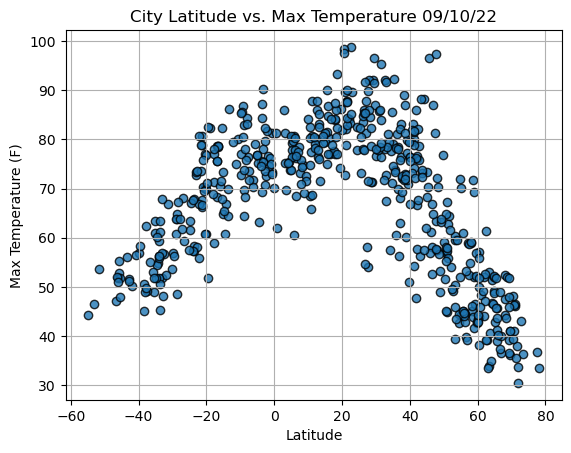

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

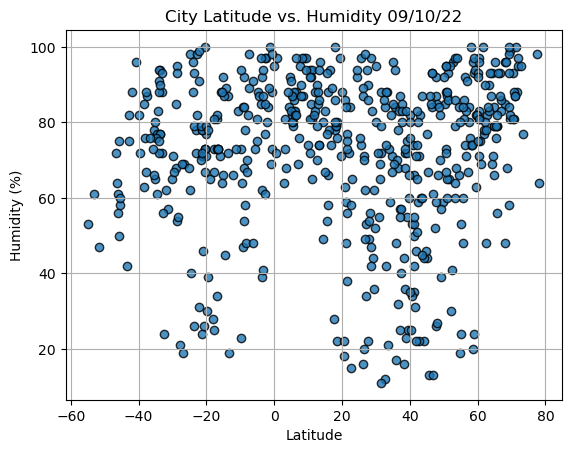

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

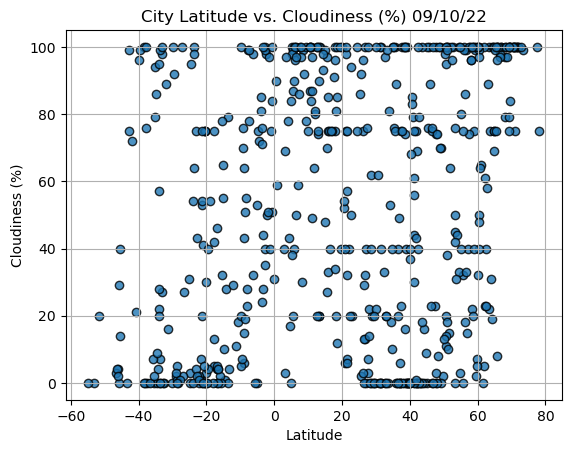

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

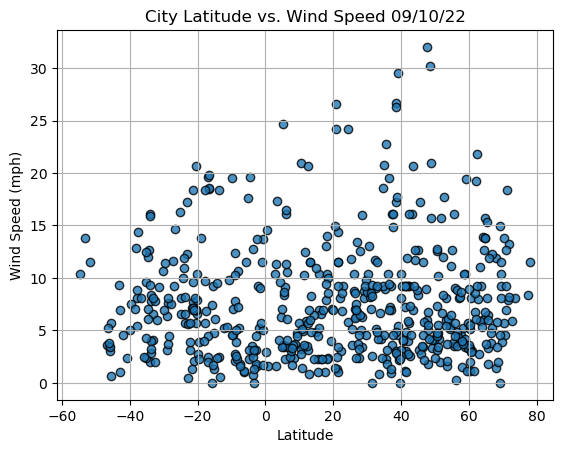

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(r_value)


In [33]:
# Create Northern and Southern Hemisphere dataframe
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

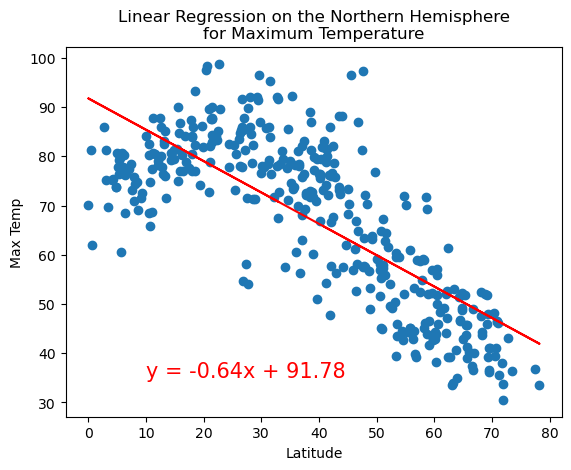

-0.7695290822741916


In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 
                       'Max Temp',(10,35))

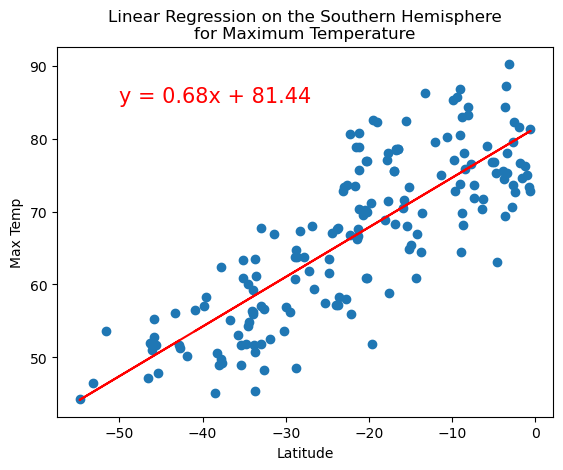

0.8128825701270667


In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 
                       'Max Temp',(-50,85))

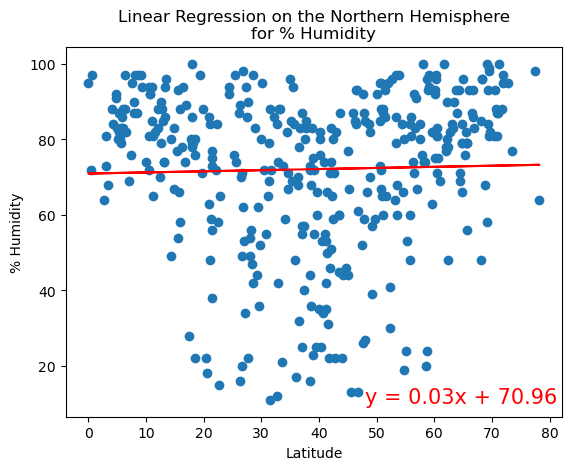

0.027808383709932313


In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["iness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', 
                       'Cloudiness',(10,60))

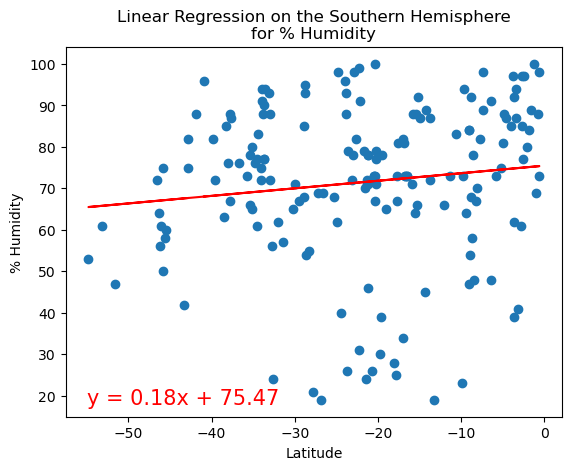

0.12651122252506478


In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', 
                       '% Humidity',(-55,18))

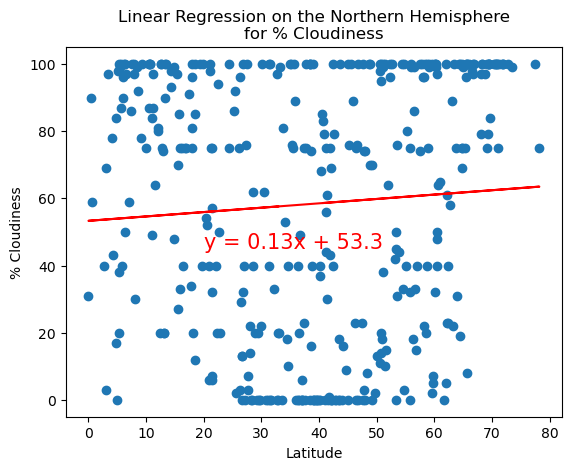

0.06770162365150785


In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', 
                       '% Cloudiness',(20,45))

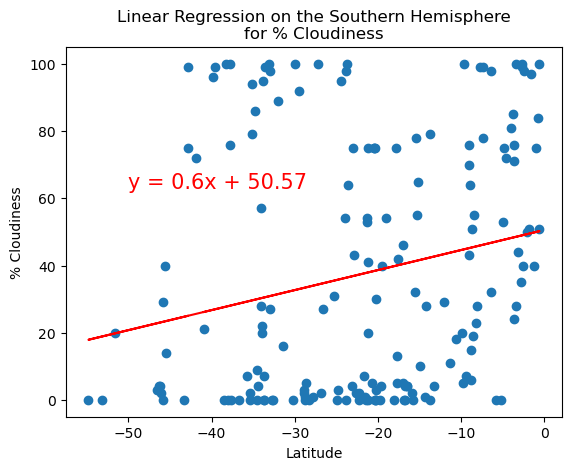

0.21470080061815927


In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', 
                       '% Cloudiness',(-50,63))

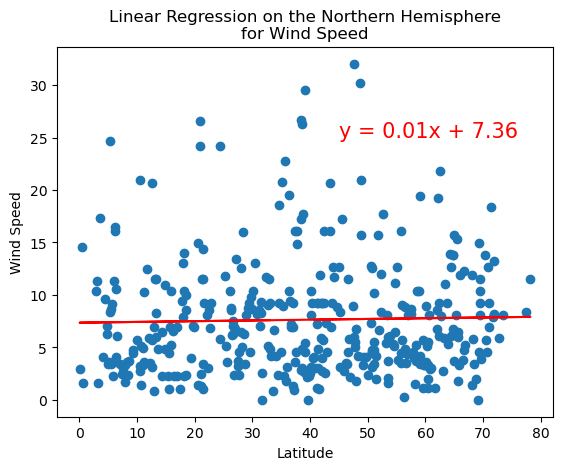

0.025499200459590008


In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',(45,25))

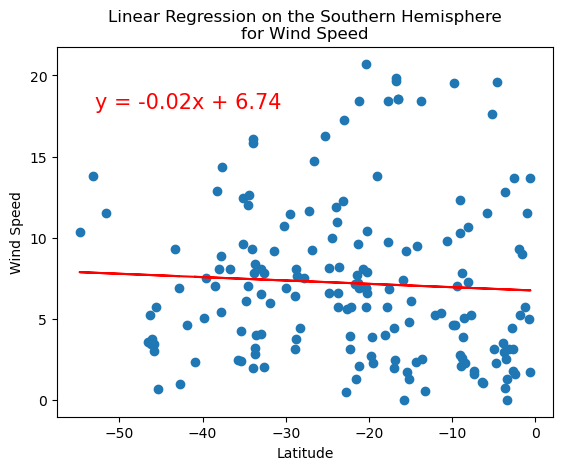

-0.05635383510647024


In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 
                       'Wind Speed',(-53,18))